# **Inferencia estadística**
# IE11_2. Cálculo de Poder para pruebas de 1 muestra



## <font color='blue'>__Bibliografía__</font>
* Applied Statistics and Probability for Engineers. Douglas C. Montgomery, George C. Runger, 2013.

* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Things I have learned (so far) Am Psychol. Cohen J., 1990.

* Understanding The New Statistics (Multivariate Applications Series). Geoff Cumming , 2012.


## <font color='blue'>__Lecturas__</font>
* Sullivan GM, Feinn R. (2012). Using Effect Size-or Why the P Value Is Not Enough. J Grad Med Educ., 4(3):279-82. doi: 10.4300/JGME-D-12-00156.1 ***(leer ejemplo de Aspirina)***

* Steidl, R. J., Hayes, J. P., & Schauber, E. (1997). Statistical Power Analysis in Wildlife Research. The Journal of Wildlife Management, 61(2), 270–279. https://doi.org/10.2307/3802582


Recordemos de nuestro notebook anterior que una __Prueba de 1 muestra__ es una prueba de hipótesis estadística que se utiliza para establecer si la media poblacional (o proporción poblaciona), la cual desconocemos se está infiriendo a partir de una muestra, por lo tanto es desconocida, es diferente de un valor específico (target).

In [2]:
# Importamos librerías
import numpy as np #
from scipy import stats
import matplotlib.pyplot as plt

## <font color='blue'>**¿Qué es la Potencia Estadística?**</font>

La **potencia estadística** de una prueba es la probabilidad de **rechazar la hipótesis nula ($H_0$)** cuando esta es **falsa**. En otras palabras, mide la capacidad de la prueba para detectar un efecto real o una diferencia significativa, si existe.

La potencia se calcula como:

$$
\text{Potencia} = 1 - \beta
$$

Donde:
- $\beta$: Es la probabilidad de cometer un **error de tipo II**, es decir, no rechazar $H_0$ cuando esta es falsa.

Una potencia alta (típicamente 0.8 o 80%) significa que la prueba tiene una buena probabilidad de detectar un efecto si este existe. Sin embargo, incrementar la potencia requiere, generalmente:
- Un **mayor tamaño de muestra**.
- Una **reducción de la varianza** de los datos.
- Un **efecto más grande** (mayor diferencia entre las medias o proporciones).

---

### **Ejemplo Intuitivo**
Imagina que estás realizando un estudio para determinar si un nuevo medicamento reduce la presión arterial en comparación con un placebo. Si el medicamento tiene un efecto real pero la prueba no logra detectarlo, se ha cometido un error de tipo II. Una potencia alta asegura que, si el medicamento es efectivo, el estudio tiene una alta probabilidad de mostrarlo.

---

### **Visualización**
Un gráfico sencillo puede ayudar a entender la potencia. Aquí mostramos las curvas de las distribuciones bajo $H_0$ y $H_1$, con las áreas $\beta$ y $1-\beta$ (potencia):


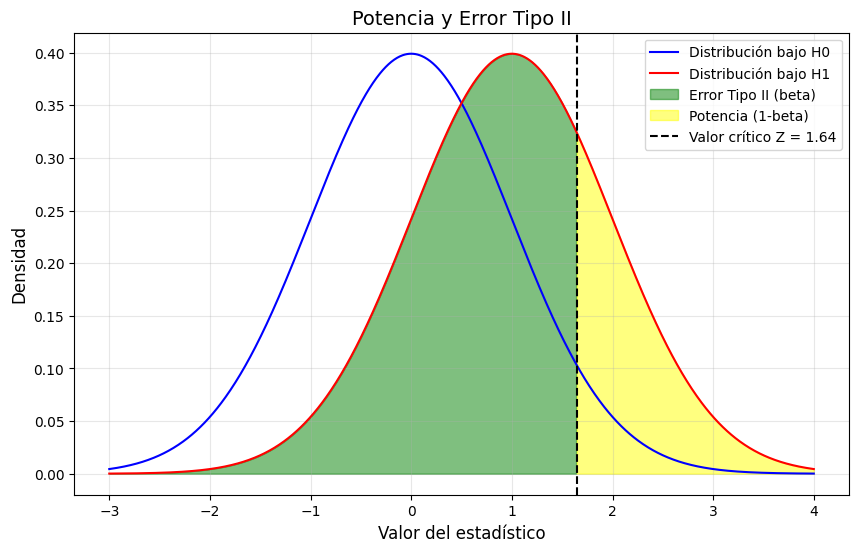

In [3]:
from scipy.stats import norm

# Parámetros
alpha = 0.05  # Nivel de significancia
mu_0 = 0  # Media bajo H0
mu_1 = 1  # Media bajo H1 (efecto)
sigma = 1  # Desviación estándar
z_critical = norm.ppf(1 - alpha)

# Rango de valores
x = np.linspace(-3, 4, 1000)
pdf_H0 = norm.pdf(x, mu_0, sigma)
pdf_H1 = norm.pdf(x, mu_1, sigma)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_H0, label="Distribución bajo H0", color="blue")
plt.plot(x, pdf_H1, label="Distribución bajo H1", color="red")

# Área de error Tipo II (beta)
plt.fill_between(x, 0, pdf_H1, where=(x <= z_critical), color="green", alpha=0.5, label="Error Tipo II (beta)")

# Área de potencia (1-beta)
plt.fill_between(x, 0, pdf_H1, where=(x > z_critical), color="yellow", alpha=0.5, label="Potencia (1-beta)")

# Línea crítica
plt.axvline(z_critical, color="black", linestyle="--", label=f"Valor crítico Z = {z_critical:.2f}")

# Etiquetas y leyenda
plt.title("Potencia y Error Tipo II", fontsize=14)
plt.xlabel("Valor del estadístico", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=10, loc="upper right")
plt.grid(alpha=0.3)
plt.show()

### <font color='blue'> **Veamos un ejemplo**</font>

Imaginemos que trabajamos en una compañía que desarrolla un producto de marketing digital, cuya promesa de valor es ayudar a los clientes a incrementar el **engagement** con sus usuarios. Para validar nuestra propuesta, implementamos nuestro producto estrella para mejorar el **onboarding** de nuevos clientes en una compañía prestigiosa.

El objetivo es evaluar el impacto en el engagement midiendo el tiempo promedio diario que los clientes pasan en la plataforma. Actualmente, este cliente exhibe un tiempo promedio diario de **200 minutos**, con una desviación estándar de **35 minutos**. Queremos verificar si nuestro producto mejora este tiempo de actividad.

---

#### **Planteamiento de hipótesis**
- **Hipótesis nula ($H_0$):** $\mu = 200$ (el producto no tiene impacto).
- **Hipótesis alternativa ($H_1$):** $\mu > 200$ (el producto incrementa el tiempo de actividad).

---

#### **Datos del experimento**
- Se ejecutó un experimento durante **2 semanas** con una muestra de **50 clientes**.
- Los resultados mostraron un **promedio de 212 minutos**, lo que indica un efecto de **12 minutos** respecto al promedio actual.

---

#### **Parámetros para el cálculo**
- Nivel de significancia: $\alpha = 0.05$ (error tipo I).
- Desviación estándar ($\sigma$): 35 minutos.
- Tamaño de muestra ($n$): 50.
- Efecto observado: 12 minutos.

Con esta información, calcularemos el **poder estadístico** del experimento para determinar la probabilidad de detectar una mejora real en el engagement.




In [4]:
from statsmodels.stats.power import TTestPower

# Datos del experimento
mu_0 = 200  # Media bajo H0
mu_1 = 212  # Media observada bajo H1
sigma = 35  # Desviación estándar
n = 50  # Tamaño de la muestra
alpha = 0.05  # Nivel de significancia

# Calcular el tamaño del efecto utilizando la fórmula de Cohen's d:
# - `mu_1`: La media bajo la hipótesis alternativa (valor esperado según H1).
# - `mu_0`: La media bajo la hipótesis nula (valor esperado según H0).
# - `sigma`: La desviación estándar de la población.
# Cohen's d mide la diferencia estandarizada entre dos medias:
#     - Cuantifica la magnitud del efecto en unidades de desviación estándar.
#     - Permite comparaciones entre estudios, independientemente de la escala de medición original.
# ¿Por qué usar Cohen's d (tamaño del efecto)?
#     - Proporciona una medida universal de la magnitud del efecto.
#     - Ayuda a interpretar la significancia práctica de los resultados, no solo la significancia estadística.
#     - Es necesario para análisis de potencia y cálculos de tamaño de muestra.
effect_size = (mu_1 - mu_0) / sigma  # Tamaño del efecto (Cohen's d)


# Análisis de poder
analysis = TTestPower()
# Calcula la potencia estadística de una prueba de hipótesis utilizando el método `solve_power`.
# - `effect_size`: El tamaño del efecto estandarizado (diferencia entre las medias dividida por la desviación estándar).
# - `nobs`: El tamaño de la muestra o número de observaciones (n).
# - `alpha`: El nivel de significancia de la prueba (probabilidad de rechazar la hipótesis nula cuando es verdadera).
# - `alternative`: Especifica el tipo de prueba:
#     - 'two-sided': Prueba para detectar cualquier diferencia (no específica en dirección).
#     - 'larger': Prueba si la media muestral es mayor que la media poblacional (prueba unilateral).
#     - 'smaller': Prueba si la media muestral es menor que la media poblacional (prueba unilateral).
# El resultado, `power`, es la probabilidad de rechazar correctamente la hipótesis nula (1 - error Tipo II).
power = analysis.solve_power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='larger')



print(f"Tamaño del efecto (Cohen's d): {effect_size:.2f}")
print(f"Poder estadístico: {power:.2%}")

Tamaño del efecto (Cohen's d): 0.34
Poder estadístico: 77.21%


Z crítico: 1.64
Valor crítico en minutos: 208.14


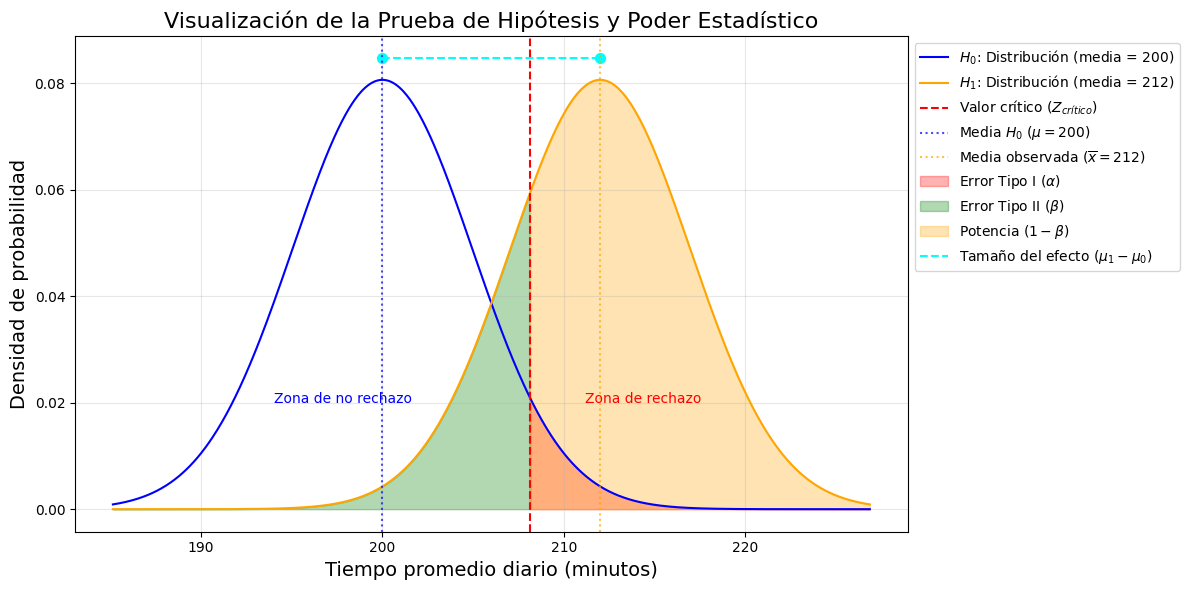

In [5]:
# Parámetros base
Mu = 200  # Media bajo H0
Sigma = 35  # Desviación estándar
n = 50  # Tamaño de muestra
x_bar = 212  # Media observada
alpha = 0.05  # Nivel de significancia
efecto = x_bar - Mu  # Tamaño del efecto

# 1. Valor crítico de Z y su equivalente en minutos
Zcritico = stats.norm.ppf(1 - alpha)  # Valor crítico Z para cola derecha
valor_minutos_zcritico = stats.norm(Mu, Sigma / np.sqrt(n)).ppf(1 - alpha)

print(f'Z crítico: {Zcritico:.2f}')
print(f'Valor crítico en minutos: {valor_minutos_zcritico:.2f}')

# 2. Distribuciones bajo H0 y H1
x = np.linspace(Mu - 3 * Sigma / np.sqrt(n), x_bar + 3 * Sigma / np.sqrt(n), 1000)
pdf_H0 = stats.norm(Mu, Sigma / np.sqrt(n)).pdf(x)
pdf_H1 = stats.norm(x_bar, Sigma / np.sqrt(n)).pdf(x)

# 3. Visualización
plt.figure(figsize=(12, 6))

# Distribución bajo H0 y H1
plt.plot(x, pdf_H0, label='$H_0$: Distribución (media = 200)', color='blue')
plt.plot(x, pdf_H1, label='$H_1$: Distribución (media = 212)', color='orange')

# Líneas críticas y observadas
plt.axvline(valor_minutos_zcritico, color='red', linestyle='--', label='Valor crítico ($Z_{crítico}$)')
plt.axvline(Mu, color='blue', linestyle=':', alpha=0.7, label='Media $H_0$ ($\mu = 200$)')
plt.axvline(x_bar, color='orange', linestyle=':', alpha=0.7, label='Media observada ($\overline{x} = 212$)')

# Áreas sombreadas
plt.fill_between(x, pdf_H0, 0, where=(x > valor_minutos_zcritico), color='red', alpha=0.3, label='Error Tipo I ($\\alpha$)')
plt.fill_between(x, pdf_H1, 0, where=(x < valor_minutos_zcritico), color='green', alpha=0.3, label='Error Tipo II ($\\beta$)')
plt.fill_between(x, pdf_H1, 0, where=(x > valor_minutos_zcritico), color='orange', alpha=0.3, label='Potencia ($1-\\beta$)')

# Tamaño del efecto
pos_y = max(pdf_H1) * 1.05
plt.hlines(y=pos_y, xmin=Mu, xmax=x_bar, color='cyan', linestyle='--', label='Tamaño del efecto ($\mu_1 - \mu_0$)')
plt.scatter([Mu, x_bar], [pos_y, pos_y], color='cyan', s=50)

# Zonas de rechazo y no rechazo
plt.text(valor_minutos_zcritico + 3, 0.02, 'Zona de rechazo', color='red', fontsize=10)
plt.text(Mu - 6, 0.02, 'Zona de no rechazo', color='blue', fontsize=10)

# Configuración de gráfico
plt.title("Visualización de la Prueba de Hipótesis y Poder Estadístico", fontsize=16)
plt.xlabel("Tiempo promedio diario (minutos)", fontsize=14)
plt.ylabel("Densidad de probabilidad", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

### <font color='green'>Actividad 1</font>
A partir del código anterior, modifique los valores del mismo: $\mu$, $n$, $\bar{x}$, $\alpha$, $\beta$, _tamaño del efecto_, etc., de forma tal que se visualice:
1. un aumento de la potencia producto del aumento del tamaño muestral.
2. un $\text{p-value} < \alpha$ que permita rechazar una $H_0$, pero una mala potencia
3. un $\text{p-value} > \alpha$
4. un tamaño de efecto insignificante
5. una $H_0$ no rechazada
6. un $\alpha = 0.1$

Reflexione sobre las cambios cambios en las zonas del gráfico, los errores Tipo I y II, etc.

Z crítico: 1.64
Valor crítico en minutos: 208.14


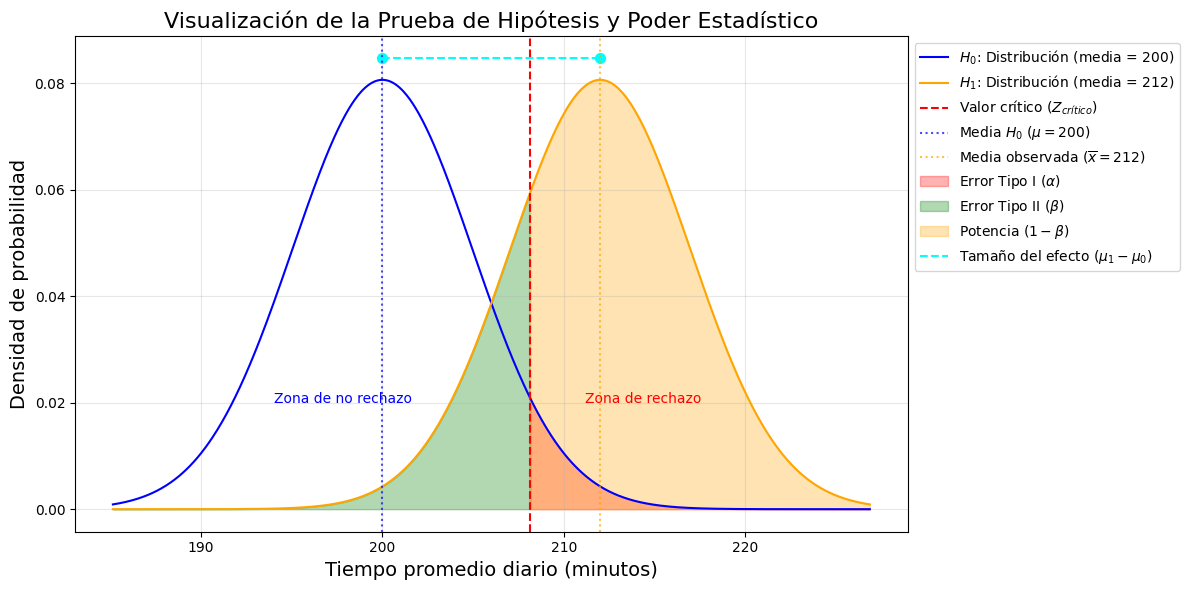

In [6]:
# Tu código aquí ...
# Parámetros base
Mu = 200  # Media bajo H0
Sigma = 35  # Desviación estándar
n = 50  # Tamaño de muestra
x_bar = 212  # Media observada
alpha = 0.05  # Nivel de significancia
efecto = x_bar - Mu  # Tamaño del efecto

# 1. Valor crítico de Z y su equivalente en minutos
Zcritico = stats.norm.ppf(1 - alpha)  # Valor crítico Z para cola derecha
valor_minutos_zcritico = stats.norm(Mu, Sigma / np.sqrt(n)).ppf(1 - alpha)

print(f'Z crítico: {Zcritico:.2f}')
print(f'Valor crítico en minutos: {valor_minutos_zcritico:.2f}')

# 2. Distribuciones bajo H0 y H1
x = np.linspace(Mu - 3 * Sigma / np.sqrt(n), x_bar + 3 * Sigma / np.sqrt(n), 1000)
pdf_H0 = stats.norm(Mu, Sigma / np.sqrt(n)).pdf(x)
pdf_H1 = stats.norm(x_bar, Sigma / np.sqrt(n)).pdf(x)

# 3. Visualización
plt.figure(figsize=(12, 6))

# Distribución bajo H0 y H1
plt.plot(x, pdf_H0, label='$H_0$: Distribución (media = 200)', color='blue')
plt.plot(x, pdf_H1, label='$H_1$: Distribución (media = 212)', color='orange')

# Líneas críticas y observadas
plt.axvline(valor_minutos_zcritico, color='red', linestyle='--', label='Valor crítico ($Z_{crítico}$)')
plt.axvline(Mu, color='blue', linestyle=':', alpha=0.7, label='Media $H_0$ ($\mu = 200$)')
plt.axvline(x_bar, color='orange', linestyle=':', alpha=0.7, label='Media observada ($\overline{x} = 212$)')

# Áreas sombreadas
plt.fill_between(x, pdf_H0, 0, where=(x > valor_minutos_zcritico), color='red', alpha=0.3, label='Error Tipo I ($\\alpha$)')
plt.fill_between(x, pdf_H1, 0, where=(x < valor_minutos_zcritico), color='green', alpha=0.3, label='Error Tipo II ($\\beta$)')
plt.fill_between(x, pdf_H1, 0, where=(x > valor_minutos_zcritico), color='orange', alpha=0.3, label='Potencia ($1-\\beta$)')

# Tamaño del efecto
pos_y = max(pdf_H1) * 1.05
plt.hlines(y=pos_y, xmin=Mu, xmax=x_bar, color='cyan', linestyle='--', label='Tamaño del efecto ($\mu_1 - \mu_0$)')
plt.scatter([Mu, x_bar], [pos_y, pos_y], color='cyan', s=50)

# Zonas de rechazo y no rechazo
plt.text(valor_minutos_zcritico + 3, 0.02, 'Zona de rechazo', color='red', fontsize=10)
plt.text(Mu - 6, 0.02, 'Zona de no rechazo', color='blue', fontsize=10)

# Configuración de gráfico
plt.title("Visualización de la Prueba de Hipótesis y Poder Estadístico", fontsize=16)
plt.xlabel("Tiempo promedio diario (minutos)", fontsize=14)
plt.ylabel("Densidad de probabilidad", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()




<font color='green'>Fin actividad 1</font>

### <font color='blue'>**Cálculo del Tamaño de Muestra**</font>

El cálculo del tamaño de muestra es un paso crucial en el diseño de experimentos estadísticos, ya que determina cuántos sujetos son necesarios para detectar un efecto con suficiente poder estadístico, minimizando los errores tipo I y tipo II. Este análisis puede ser realizado utilizando enfoques teóricos o herramientas computacionales.

---

#### **Parámetros Necesarios**
Para determinar el tamaño adecuado de la muestra, se requieren los siguientes elementos:
- **Nivel de significancia ($\alpha$):** La probabilidad de cometer un error tipo I (rechazar una hipótesis nula verdadera).
- **Potencia ($1-\beta$):** La probabilidad de detectar un efecto verdadero (evitar un error tipo II).
- **Tamaño del efecto:** La magnitud mínima del cambio que se desea detectar (por ejemplo, diferencia de medias o proporciones).
- **Varianza o desviación estándar:** Una medida de la dispersión de los datos.

---

### **1. Basado en la Diferencia de Medias**
Este método es ideal para comparar medias entre dos grupos, utilizando la fórmula:

$$
N = \frac{{2(Z_{1-\alpha/2} + Z_{1-\beta})^2 \cdot \sigma^2}}{{(\mu_1 - \mu_2)^2}}
$$

Donde:
- $\sigma$: Desviación estándar común de las dos poblaciones.
- $\mu_1, \mu_2$: Medias de las poblaciones.
- $Z_{1-\alpha/2}$: Valor crítico para el nivel de significancia $\alpha$.
- $Z_{1-\beta}$: Valor crítico para la potencia deseada.

**Aplicación:** Estudios clínicos o experimentos con variables continuas.



### Intuición de la fórmula del tamaño de muestra

La fórmula para calcular el tamaño de muestra necesario para una prueba de hipótesis de dos medias es:

$$
N = \frac{{2(Z_{1-\alpha/2} + Z_{1-\beta})^2 \cdot \sigma^2}}{{(\mu_1 - \mu_2)^2}}
$$

Esta fórmula se utiliza para equilibrar la sensibilidad de la prueba (potencia) y la precisión requerida (nivel de significancia) para detectar una diferencia específica entre las medias poblacionales $\mu_1$ y $\mu_2$.

---

#### Componentes de la fórmula:

1. **$Z_{1-\alpha/2}$**: Es el valor crítico asociado con el nivel de significancia $\alpha$. Representa el rango aceptable de la distribución bajo la hipótesis nula (usualmente en una prueba bilateral). Este término asegura que el nivel de confianza sea el deseado (por ejemplo, 95%).

2. **$Z_{1-\beta}$**: Es el valor crítico asociado con la potencia de la prueba ($1-\beta$). Indica la probabilidad de detectar un efecto real (rechazar correctamente la hipótesis nula). Un nivel de potencia mayor implica un aumento en este valor.

3. **$\sigma^2$**: Es la varianza poblacional (o una estimación de esta). Representa la variabilidad inherente en los datos. Cuanto mayor sea la variabilidad, mayor será el tamaño de muestra necesario para detectar una diferencia significativa.

4. **$(\mu_1 - \mu_2)^2$**: Es el cuadrado de la diferencia esperada entre las medias de las dos poblaciones. Este término representa la magnitud del efecto que se desea detectar. Una diferencia más pequeña requiere un tamaño de muestra más grande.

5. **Numerador**: $2(Z_{1-\alpha/2} + Z_{1-\beta})^2 \cdot \sigma^2$. Representa el impacto combinado del nivel de confianza, la potencia, y la variabilidad de los datos en el tamaño de la muestra.

6. **Denominador**: $(\mu_1 - \mu_2)^2$. Ajusta el tamaño de la muestra según la magnitud de la diferencia esperada.

---

#### Intuición:

- **Mayor variabilidad ($\sigma^2$)**: Aumenta la incertidumbre, por lo que se requiere un tamaño de muestra más grande para obtener resultados significativos.
- **Menor diferencia entre medias ($\mu_1 - \mu_2$)**: Detectar pequeñas diferencias requiere una muestra más grande, ya que estas son más difíciles de identificar con certeza estadística.
- **Nivel de confianza ($Z_{1-\alpha/2}$) y potencia ($Z_{1-\beta}$)**: Incrementar el nivel de confianza (por ejemplo, del 95% al 99%) o la potencia (por ejemplo, del 80% al 90%) implica un mayor tamaño de muestra porque se necesita más precisión en los resultados.

---

En resumen, esta fórmula combina el nivel de confianza, la potencia



---

### **2. Basado en Proporciones**
Usado para comparar proporciones entre dos grupos (e.g., tasas de éxito o incidencia):

$$
N = \frac{{(p_0q_0 + p_1q_1)(Z_{1-\alpha/2} + Z_{1-\beta})^2}}{{(p_1 - p_0)^2}}
$$

Donde:
- $p_0$: Proporción bajo la hipótesis nula ($H_0$).
- $p_1$: Proporción bajo la hipótesis alternativa ($H_1$).
- $q_0 = 1 - p_0$: Complemento de la proporción bajo $H_0$.
- $q_1 = 1 - p_1$: Complemento de la proporción bajo $H_1$.
- $Z_{1-\alpha/2}$: Valor crítico para el nivel de significancia $\alpha$.
- $Z_{1-\beta}$: Valor crítico para la potencia deseada.

**Aplicación:** Estudios epidemiológicos y encuestas.

---

### **3. Basado en el Tamaño del Efecto (Cohen’s $d$)**
El tamaño del efecto estandarizado, como Cohen’s $d$, permite calcular el tamaño muestral para comparar diferencias relativas:

$$
d = \frac{{\mu_1 - \mu_2}}{{\sigma}}
$$
<br><br>
$$
n = \frac{{(Z_{1-\alpha/2} + Z_{1-\beta})^2}}{{d^2}}
$$

Donde:
- $Z_{1-\alpha/2}$: Valor crítico de $Z$ para el nivel de significancia (\alpha), dependiendo de si es una prueba bilateral (división en dos colas).
- $Z_{1-\beta}$: Valor crítico de $Z$ para alcanzar la potencia deseada (1-\beta).
- $d$: Tamaño del efecto estandarizado, calculado como:
$$
d = \frac{{\mu_1 - \mu_2}}{{\sigma}}
$$

El tamaño de muestra se estima mediante software o fórmulas específicas en función de $d$, $\alpha$, y $1-\beta$.

**Aplicación:** Estudios psicológicos o de ciencias sociales.

In [7]:
# Ejemplo basado en diferencia de medias
from scipy.stats import norm

# Parámetros
sigma = 15  # Desviación estándar común
mu1 = 100  # Media bajo H0
mu2 = 110  # Media bajo H1 (efecto esperado)
alpha = 0.05  # Nivel de significancia
beta = 0.2  # Probabilidad de error tipo II (1 - potencia)

# Cálculos
z_alpha = norm.ppf(1 - alpha / 2)  # Valor crítico para α
z_beta = norm.ppf(1 - beta)  # Valor crítico para β
n = (2 * (z_alpha + z_beta)**2 * sigma**2) / (mu2 - mu1)**2  # Tamaño de muestra

print(f"Tamaño de muestra necesario (diferencia de medias): {np.ceil(n)}")

Tamaño de muestra necesario (diferencia de medias): 36.0


In [8]:
# Ejemplo basado en proporciones

# Parámetros
p0 = 0.5  # Proporción bajo H0
p1 = 0.6  # Proporción bajo H1 (efecto esperado)
alpha = 0.05  # Nivel de significancia
beta = 0.2  # Probabilidad de error tipo II (1 - potencia)

# Cálculos
q0 = 1 - p0  # Complemento de p0
q1 = 1 - p1  # Complemento de p1
z_alpha = norm.ppf(1 - alpha / 2)  # Valor crítico para α
z_beta = norm.ppf(1 - beta)  # Valor crítico para β
n = ((p0 * q0 + p1 * q1) * (z_alpha + z_beta)**2) / (p1 - p0)**2  # Tamaño de muestra

print(f"Tamaño de muestra necesario (proporciones): {np.ceil(n)}")

Tamaño de muestra necesario (proporciones): 385.0


In [9]:
# Ejemplo basado en tamaño del efecto

# Parámetros
mu1 = 100  # Media bajo H0
mu2 = 110  # Media bajo H1 (efecto esperado)
sigma = 15  # Desviación estándar
alpha = 0.05  # Nivel de significancia
beta = 0.2  # Probabilidad de error tipo II (1 - potencia)

# Cálculos
d = (mu2 - mu1) / sigma  # Tamaño del efecto estandarizado (Cohen's d)
z_alpha = norm.ppf(1 - alpha / 2)  # Valor crítico para α
z_beta = norm.ppf(1 - beta)  # Valor crítico para β
n = (z_alpha + z_beta)**2 / d**2  # Tamaño de muestra

print(f"Tamaño de muestra necesario (tamaño del efecto - Cohen's d): {np.ceil(n)}")

Tamaño de muestra necesario (tamaño del efecto - Cohen's d): 18.0


Hay muchas formas de determinar el tamaño muestral dependiendo del estrudio que estemos realizando. Analiza las diferencias que pueden existir entre las distintas versiones e implementaciones; observa el siguiente ejemplo:

In [10]:
from statsmodels.stats.power import tt_solve_power
import numpy as np
from scipy.stats import norm

# Parámetros
p0 = 0.53  # Proporción bajo H0
efecto_bruto = 0.05  # Diferencia mínima detectable
p1 = p0 - efecto_bruto  # Proporción bajo H1
alpha = 0.05  # Nivel de significancia
beta = 0.20  # Probabilidad de error tipo II (1 - potencia)
poder = 1 - beta

# Complementos de las proporciones
q0 = 1 - p0  # Complemento de p0
q1 = 1 - p1  # Complemento de p1

# Tamaño muestral con fórmula ajustada (solo H0, como statsmodels)
Z_alpha = norm.ppf(1 - alpha / 2)  # Valor crítico para alpha/2 (dos colas)
Z_beta = norm.ppf(1 - beta)       # Valor crítico para beta
N = ((p0 * q0 + p1 * q1) * (Z_alpha + Z_beta)**2) / (p1 - p0)**2

print(f"Tamaño mínimo muestra (manual): {N:.2f}")

# Tamaño muestral con statsmodels (default, solo H0)
sigma = np.sqrt(p0 * q0)  # Desviación estándar bajo H0
effect_size = efecto_bruto / sigma
n_sample_default = tt_solve_power(effect_size=effect_size, nobs=None, alpha=alpha, power=poder, alternative='two-sided')

print(f"Tamaño mínimo muestra (statsmodels default): {n_sample_default:.2f}")
N_adjusted = ((p0 * q0) * (Z_alpha + Z_beta)**2) / (p1 - p0)**2
print(f"Tamaño mínimo muestra (fórmula manual ajustada): {N_adjusted:.2f}")


Tamaño mínimo muestra (manual): 1565.69
Tamaño mínimo muestra (statsmodels default): 783.98
Tamaño mínimo muestra (fórmula manual ajustada): 782.06


Diferencias:

- El método manual es más preciso al considerar las varianzas bajo ambas hipótesis.
-El método con statsmodels, por defecto, se simplifica al usar la varianza bajo H_0 únicamente.
- Ajustar el tamaño del efecto en statsmodels a la varianza combinada puede hacer que los resultados coincidan.
- El método manual es más específico para problemas donde se consideran explícitamente las proporciones bajo H_0 y H_1.
- statsmodels es más general y aplica una aproximación estandarizada para varios tipos de pruebas.

## <font color='blue'>**Ejemplo de Experimento Natural (no controlado)**</fontr>

En este ejemplo vamos a presentar la forma sobre como calcular el Poder estadístico en un __experimento natural__ (una muestra contra un target).

Imagina que eres parte del Equipo Digital de una organización de servicios financieros B2C, responsable del rendimiento del sitio web corporativo. En los últimos meses, se ha observado una disminución en el tráfico (visitas totales) y un aumento en la tasa de rebote, que ahora supera el umbral del 50%. Actualmente, la tasa de rebote es del 53%.

La organización quiere implementar un cambio en el diseño del sitio web para mejorar la tasa de rebote, con el objetivo de reducirla a menos del 50%. Antes de implementar el cambio, deseas evaluar los resultados de las pruebas realizadas bajo tres escenarios distintos, para determinar si el cambio esperado es estadísticamente significativo:

Escenarios Evaluados:
- Escenario 1: Se realizaron pruebas con 350 visitantes, obteniendo una tasa de rebote de 47%.
- Escenario 2: Se realizaron pruebas con 700 visitantes, obteniendo una tasa de rebote de 49%.
- Escenario 3: Se realizaron pruebas con 700 visitantes, obteniendo una tasa de rebote de 47%.

Objetivos:

1.	Evaluar si los resultados en cada escenario son estadísticamente significativos ( $p$-value).
2.	Calcular el poder estadístico de cada escenario.
3.	Interpretar los resultados y determinar si los experimentos proporcionan suficiente evidencia para respaldar el cambio implementado.

<img src='https://drive.google.com/uc?export=view&id=1ZhKs4HPbDjUJP0VQRFmpYSYT173eX1D2' width="400" align="center" style="margin-right: 20px">
<br>

## Tasa de Rebote y su Importancia en el Ejemplo

### ¿Qué es la Tasa de Rebote?

La **tasa de rebote** se refiere al porcentaje de visitantes que abandonan un sitio web después de haber interactuado solo con una página, sin realizar ninguna acción adicional (como hacer clic en un enlace, navegar a otra sección, o completar un formulario). Es un indicador clave en el análisis del rendimiento de sitios web, especialmente para entender el compromiso de los usuarios.

### Contexto del Ejemplo

En este caso:

- Una tasa de rebote del **53%** indica que más de la mitad de los visitantes del sitio web abandonan sin interactuar más allá de la página inicial.
- El objetivo de la organización es reducir esta tasa por debajo del **50%**, lo que significaría un mayor nivel de interacción y compromiso por parte de los usuarios.

### Importancia en este Ejemplo

1. **Problema detectado**:
   - El aumento en la tasa de rebote sugiere que los usuarios no encuentran el sitio web atractivo o útil, lo que podría afectar las conversiones y los objetivos del negocio.

2. **Objetivo del experimento**:
   - Evaluar si el rediseño del sitio web puede reducir la tasa de rebote por debajo del umbral crítico del 50%.

3. **Escenarios evaluados**:
   - Se analizan los resultados de las pruebas realizadas con diferentes tamaños de muestra (visitantes) y tasas de rebote observadas, para determinar si la mejora observada es estadísticamente significativa.

### Resumen

En este ejemplo, la tasa de rebote es la métrica clave para evaluar el éxito del rediseño del sitio web. Su análisis permite tomar decisiones basadas en datos sobre la implementación de cambios, asegurando que las modificaciones mejoren la interacción del usuario y logren los objetivos deseados.


### __1. Seleccionar un desafío de negocio__

En este caso el desafío es aumentar el _engagement_ en el sitio web de la compañía.

* **Posibles métricas de éxito.**
 * Tasa de rebote (%)
 * Tiempo promedio visita (minutos).


>Nota: Utilizaremos la primera (tasa de rebote), la cual al ser una proporción nos permitirá aplicar una prueba $Z$ de 1 muestra. En el caso de utilizar la segunda métrica (tiempo promedio visita), la misma nos permitiría utilizar las pruebas _T Student_ o $Z$ de 1 muestra.

### __2. Definir una hipótesis__

Tenemos las siguientes ideas para mejorar el engagemen; léalas de la forma:
>"Si \<idea\...>  entonces se producirá una mejora en el engagement"

1.  cambiamos el color del fondo (actual naranjo, cambiar por un celeste)
2.  cambiamos la imagen de bienvenida (actual un paisaje, cambiar por una persona sonriendo)
3.  cambiamos la tipografía del sitio (actual Times, cambiar por Corbel)
4.  cambiamos el texto del CTA (call to action)
5.  etc.

Para seguir con nuestro ejemplo, priorizaremos la idea #2.
* __Hipótesis__: una imagen de una persona sonriendo en la bienvenida, aumentará el engagement del usuario con el sitio web, ya que genera mayor confianza en los visitantes.


La prueba de hipótesis estadística aquí sería:
* __Hipótesis nula__ (__$H_0$__): la proporción de visitantes que abandonan el sitio web (antes de 1 minuto)  es **igual** a la del rendimiento actual (línea base), es decir, un 53%.
* __Hipótesis alternativa__ (__$H_1$)__: la proporción de visitantes que abandonan el sitio web (antes de 1 minuto)  es **menor** a la del rendimiento actual (línea base), es decir, menor a 53%.

Planteamiento estadístico:
$$H_0: \quad p = 0.53$$
$$H_1: \quad p < 0.53$$


### __3. Determinar el tamaño de la muestra__

Es importante mencionar que antes de realizar un estudio, los investigadores (ustedes) deben determinar cuántos sujetos deben incluirse en el experimento. Si se aplica el experimento a muy pocos sujetos, es posible que un estudio no tenga suficiente poder estadístico para detectar una diferencia (__error de tipo II__). Por el contrario si el experimento se aplica a demasiados sujetos puede ser innecesariamente costoso o llevarnos mucho tiempo.

Para determinar la cantidad adecuada es necesario contar con los siguientes parámetros:

* Nivel de significancia ($\alpha$ o Error Tipo I)
* Potencia de prueba ($1- \beta$)
* Tamaño del efecto deseado
* Varianza de la población ($\sigma$)

Normalmente se presetea $\;\alpha = 0.05$, $\;\beta = 0.20$, y con ello la $\text{Potencia} = 0.80$.

Para determinar el tamaño del efecto deseado, es necesario hablar con el cuerpo expertos en esta materia en la organozación. Imaginemos que estos expertos nos indican que, para el negocio, es crítico bajar en 500 puntos base (5%) en términos absolutos. De esta forma, con la nueva versión (tratamiento) el porcentaje de visitantes que abandona el sitio antes de un minuto sea menor o igual a 48% (i.e., $0.53 - 0.05 = 0.48$).


In [11]:
# Datos para la ecuación
# Escenario con una cola

p0 = 0.53 # linea base de proporción rebote
efecto_bruto = 0.05 # valor mínimo (diferencia) a detectar como mejora del estudio
p1 = p0 - efecto_bruto
alpha = 0.05
beta = 0.20

# Por defecto stats.norm genera una distribución normal estandarizada,
# de ahí que nos sirve para calcular los valores de Z
n = ((p0 * (1 - p0) * (stats.norm.ppf(1-alpha) + stats.norm.ppf(1-beta))**2 ) / (p1 - p0)**2)

print(f'Tamaño mínimo muestra: {n:5.1f}')

Tamaño mínimo muestra: 616.0


### __4. Ejecutar el experimento__

En esta parte el Equipo de Digital construye la nueva versión de la página web con la nueva imagen, define los días donde se ejecutará el experimento, y comienza a dirigir tráfico de forma aleatoria, hasta completar el tiempo del experimento y la cantidad mínima de la muestra.

Con los datos obtenidos, se procederá a realizar un análisis de datos en el siguiente paso.

### __5. Medir resultados__

Se ha finalizado el periodo de experimentación de la nueva versión y se procede a evaluar su efectividad.

Para efectos demostrativos, asumiremos 3 posibles escenarios de experimentos, los cuales simulan condiciones reales típicas de este tipo de actividades.

1.   Escenario 1: se realizó una prueba de una semana en la cual tuvimos solo 350 visitantes, obteniendo una Tasa de Rebote de 47%.

2.   Escenario 2: se realizó una prueba de una semana en la cual tuvimos 700 visitantes, obteniendo una Tasa de Rebote de 49%.

3.   Escenario 3: se realizó una prueba de una semana en la cual tuvimos 700 visitantes, obteniendo una Tasa de Rebote de 47%.

La evaluación que se realizará en esta sección también es conocida como **Análisis post-hoc**. En esta parte del flujo, se evalúan los resultados de una investigación luego de correr un experimento. El uso de esta técnica sin el anterior uso previo del __Análisis a priori__, ha sido cuestionada ya que no permite diseñar y planear de antemano un estudio.

#### __5.1. Análisis del Escenario 1__

Procedemos a calcular el valor de $Z$ crítico (para una prueba de 1 cola, cola izquierda con $\alpha = 0.05$) y su valor correspondiente de proporción muestral (para la tasa de rebote).  El valor que obtendremos en esta operación corresponderá a la proporción límite hasta donde la proporción muestral que se obtenga en el experimento, será considerada que cae en la zona de rechazo de la Hipótesis nula ($H_0$).  En otras palabras, si la proporción (tasa de rebote) que se obtenga con los 350 visitantes del estudio es menor a dicho valor, estaremos rechazando la Hipótesis nula, y por tanto concluiremos que el resultado del experimento es estadísticamente significativo.

Es importante mencionar que si esto sucede, este análisis  no indica nada sobre la relevancia del efecto práctico alcanzando. Esto se evaluará con el cálculo del Poder de la prueba.

In [12]:
from scipy.stats import norm

# 1. Parámetros iniciales (línea base de la población)
p = 0.53  # Proporción bajo H0
Sigma = np.sqrt(p * (1 - p))  # Desviación estándar de la población

# 2. Datos de la muestra
n = 350  # Tamaño de la muestra
p_muestra = 0.47  # Proporción observada en la muestra
Sigma_muestra = np.sqrt(p_muestra * (1 - p_muestra))  # Desviación estándar de la muestra

# 3. Nivel de significancia
alpha = 0.05  # Nivel de significancia para la prueba (cola izquierda)

# 4. Hipótesis a contrastar
# H0: p = 0.53
# H1: p < 0.53

# 5. Calcular el valor crítico de Z (cola izquierda)
Zcritico = norm.ppf(alpha)
print(f'Z crítico: {Zcritico:.3f}')

# 6. Calcular el valor límite de la proporción correspondiente al Z crítico
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)
print(f'Proporción límite (Z crítico): {valor_proporcion_zcritico:.3f}')

# 7. Calcular el Z estadístico para la proporción muestral
Z_prueba = (p_muestra - p) / (Sigma / np.sqrt(n))
print(f'Z estadístico de la prueba: {Z_prueba:.3f}')

# 8. Regla de decisión
if Z_prueba < Zcritico:
    print("Rechazamos H0: El resultado es estadísticamente significativo.")
else:
    print("No rechazamos H0: El resultado no es estadísticamente significativo.")

Z crítico: -1.645
Proporción límite (Z crítico): 0.486
Z estadístico de la prueba: -2.249
Rechazamos H0: El resultado es estadísticamente significativo.


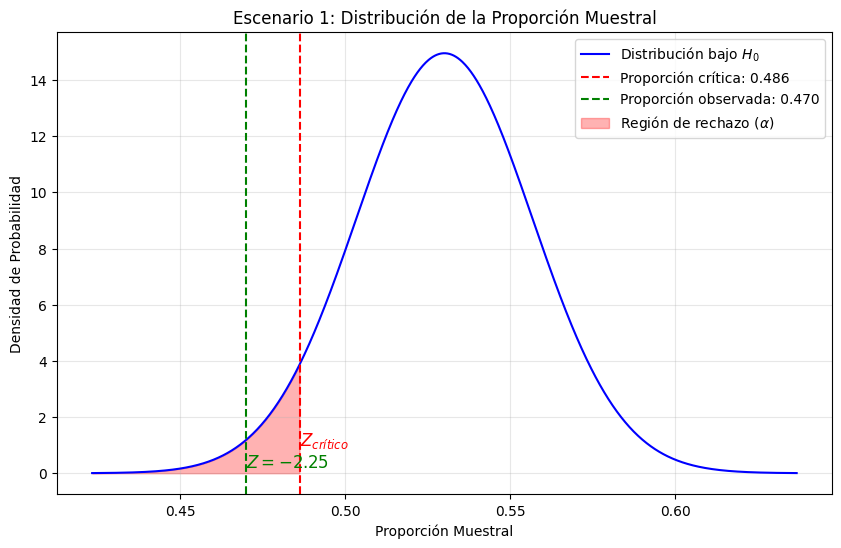

In [13]:
# 6. Visualización
x = np.linspace(p - 4 * Sigma / np.sqrt(n), p + 4 * Sigma / np.sqrt(n), 1000)  # Eje x para la distribución
y = norm.pdf(x, loc=p, scale=Sigma / np.sqrt(n))  # Densidad de probabilidad bajo H0

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución bajo $H_0$", color='blue')  # Curva de la distribución
plt.axvline(valor_proporcion_zcritico, color='red', linestyle='--', label=f'Proporción crítica: {valor_proporcion_zcritico:.3f}')  # Línea crítica
plt.axvline(p_muestra, color='green', linestyle='--', label=f'Proporción observada: {p_muestra:.3f}')  # Línea de la proporción observada

# Rellenar la región de rechazo
plt.fill_between(x, y, 0, where=(x < valor_proporcion_zcritico), color='red', alpha=0.3, label="Región de rechazo ($\\alpha$)")

# Anotaciones
plt.text(p_muestra, 0.2, f"$Z = {Z_prueba:.2f}$", fontsize=12, color='green')
plt.text(valor_proporcion_zcritico, 1, "$Z_{crítico}$", fontsize=12, color='red')

# Configuración del gráfico
plt.title("Escenario 1: Distribución de la Proporción Muestral")
plt.xlabel("Proporción Muestral")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Para esta prueba de Hipótesis, como el valor de proporción muestral obtenido con los 350 visitantes fue de "Tasa rebote= 47%", cifra menor al límite de 0.486, se puede concluir que el rebote obtenido con la nueva versión ha disminuido de forma estadísticamente significativa, esto al comparar con su línea base de 0.53.

Otra forma de evaluar este paso es calculando el _valor-p_ (_p-value_), si este valor es menor al Nivel de significancia establecido, se procede a Rechazar la $H_0$ (Hipótesis Nula), de lo contrario no se puede rechazar la $H_0$.

In [14]:
# Estadístico Z de prueba
Z = (p_muestra - p) / (Sigma / np.sqrt(n))

# Calcular el p-value
pvalue = norm.cdf(Z)  # Usando Z de prueba (cola izquierda)
print(f'p-value (significancia estadística): {pvalue:.5f}')  # 1 cola

# Conclusión
if pvalue < alpha:
    print(f"Conclusión: Rechazamos H0 con un nivel de significancia de {alpha}.")
    print("El resultado es estadísticamente significativo.")
else:
    print(f"Conclusión: No rechazamos H0 con un nivel de significancia de {alpha}.")
    print("El resultado no es estadísticamente significativo.")

p-value (significancia estadística): 0.01225
Conclusión: Rechazamos H0 con un nivel de significancia de 0.05.
El resultado es estadísticamente significativo.


**Concluir prueba de hipótesis:**
Como el $Z$ prueba (-2.249) es menor al $Z$ critico (-1.645), o como el valor-p ($\text{p-value}=0.012$) es menor al Nivel de signficancia "alpha" establecido en 0.05, se rechaza $H_0$. Por tanto se concluye que existe una diferencia estadísticamente significativa entre la tasa de rebote exhibida en la nueva versión y la tasa de rebote de la línea base.

Una vez finalizada esta parte de la prueba, __y siempre que se haya rechazado la $H_0$__, se procede a realizar el cálculo del tamaño del efecto real y el Poder de la prueba (potencia estadística).  En caso contrario no es necesario continuar, ya que el resultado obtenido en la nueva versión no sería menor a la línea base de la organización.

In [15]:
# Parámetros iniciales
p = 0.53  # Proporción bajo H0
p_muestra = 0.47  # Proporción observada (H1)
n = 350  # Tamaño de la muestra
Sigma = np.sqrt(p * (1 - p))  # Desviación estándar bajo H0
alpha = 0.05  # Nivel de significancia

# Hipótesis
# H0: p = 0.53
# H1: p = 0.47

# Calcular el tamaño del efecto
efecto = p - p_muestra  # Diferencia bruta entre proporciones
dCohen = efecto / Sigma  # d de Cohen (tamaño del efecto estandarizado)

print(f"Tamaño del efecto (bruto): {efecto:.3f}")
print(f"Tamaño del efecto (d de Cohen): {dCohen:.3f}")

# Calcular el valor crítico de la proporción para Z crítico
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)

# Calcular Beta (error tipo II) y la potencia de la prueba
# Beta: Probabilidad de no rechazar H0 cuando H1 es verdadera
beta = 1 - norm(p_muestra, Sigma / np.sqrt(n)).cdf(valor_proporcion_zcritico)
potencia = 1 - beta  # Potencia de la prueba (1 - beta)

print(f"Beta (Error Tipo II): {beta:.3f}")
print(f"Potencia de la prueba (1 - Beta): {potencia:.3f}")

Tamaño del efecto (bruto): 0.060
Tamaño del efecto (d de Cohen): 0.120
Beta (Error Tipo II): 0.273
Potencia de la prueba (1 - Beta): 0.727


**Conclusión final del Escenario 1**

El tratamiento aplicado "nueva versión del sitio web" en 350 usuarios aleatorios durante 1 semana, demuestra que la Tasa de Rebote de 47% exhibida es estadísticamente menor que el actual, esto con un nivel de confianza del 0.95.

También se aprecia que la diferencia (tamaño del efecto bruto) obtenida es relevante desde el punto de vista de negocio, ya que es de 600 puntos base (mayor al mínimo exigido), sin embargo al evaluar su potencia, el análisis arrojó un Poder por debajo del mínimo recomendable de 0.80, es decir, el efecto no tiene una potencia aceptable para respaldar la $H_1$ (Hipótesis alternativa).
Se concluye que no se puede afirmar que el tratamiento funciona. Dicho de otra manera, si se rechaza la Hipótesis nula ($H_0$) existe una alta probabilidad de cometer __Error Tipo II__ ($beta = 0.273$).

Visualicemos el Escenario 1.

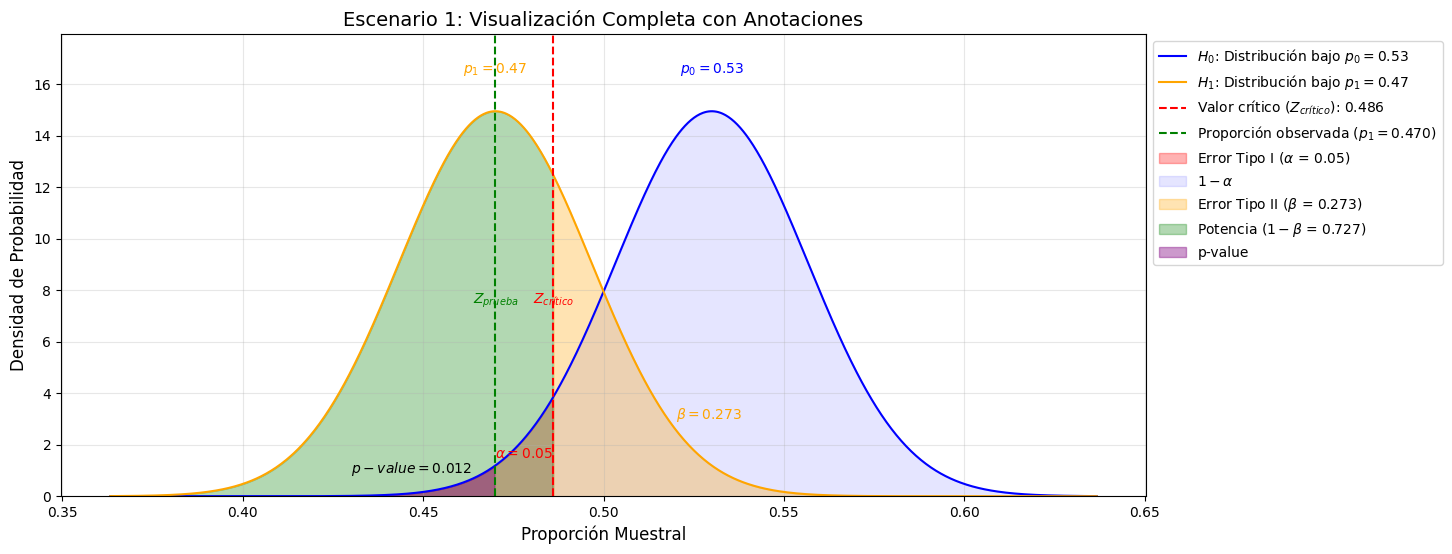

In [16]:
from scipy.stats import norm

# 1. Parámetros iniciales
p = 0.53  # Proporción bajo H0 (p0)
p_muestra = 0.47  # Proporción observada (p1)
n = 350  # Tamaño de la muestra
Sigma = np.sqrt(p * (1 - p))  # Desviación estándar bajo H0
Sigma_muestra = np.sqrt(p_muestra * (1 - p_muestra))  # Desviación estándar bajo H1
alpha = 0.05  # Nivel de significancia

# 2. Calcular valores clave
Zcritico = norm.ppf(alpha)  # Z crítico para cola izquierda
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)  # Proporción crítica
Z_prueba = (p_muestra - p) / (Sigma / np.sqrt(n))  # Z de la prueba
beta = 1 - norm(p_muestra, Sigma / np.sqrt(n)).cdf(valor_proporcion_zcritico)  # Beta
potencia = 1 - beta  # Potencia

# 3. Generar distribuciones
x = np.linspace(p_muestra - 4 * Sigma / np.sqrt(n), p + 4 * Sigma / np.sqrt(n), 1000)  # Eje x
y_H0 = norm.pdf(x, loc=p, scale=Sigma / np.sqrt(n))  # Distribución bajo H0
y_H1 = norm.pdf(x, loc=p_muestra, scale=Sigma / np.sqrt(n))  # Distribución bajo H1

# 4. Crear el gráfico
plt.figure(figsize=(14, 6))
plt.ylim(0, max(y_H1)*1.2)

# Distribución bajo H0
plt.plot(x, y_H0, label="$H_0$: Distribución bajo $p_0 = 0.53$", color="blue")
# Distribución bajo H1
plt.plot(x, y_H1, label="$H_1$: Distribución bajo $p_1 = 0.47$", color="orange")

# Línea crítica
plt.axvline(valor_proporcion_zcritico, color="red", linestyle="--", label=f"Valor crítico ($Z_{{crítico}}$): {valor_proporcion_zcritico:.3f}")
# Línea de proporción observada
plt.axvline(p_muestra, color="green", linestyle="--", label=f"Proporción observada ($p_1 = {p_muestra:.3f}$)")

# Rellenar áreas
# Región de rechazo (Error Tipo I: alfa)
plt.fill_between(x, y_H0, 0, where=(x < valor_proporcion_zcritico), color="red", alpha=0.3, label=f"Error Tipo I ($\\alpha$ = {alpha:.2f})")
# Región de no rechazo bajo H0
plt.fill_between(x, y_H0, 0, where=(x >= valor_proporcion_zcritico), color="blue", alpha=0.1, label="$1 - \\alpha$")
# Región de beta (Error Tipo II)
plt.fill_between(x, y_H1, 0, where=(x > valor_proporcion_zcritico), color="orange", alpha=0.3, label=f"Error Tipo II ($\\beta$ = {beta:.3f})")
# Región de potencia
plt.fill_between(x, y_H1, 0, where=(x <= valor_proporcion_zcritico), color="green", alpha=0.3, label=f"Potencia ($1 - \\beta$ = {potencia:.3f})")
# Región del p-value
plt.fill_between(x, y_H0, 0, where=(x < p_muestra), color="purple", alpha=0.4, label="p-value")

# Anotaciones
plt.text(p, max(y_H0) * 1.1, f"$p_0 = {p:.2f}$", fontsize=10, color="blue", ha="center")
plt.text(p_muestra, max(y_H1) * 1.1, f"$p_1 = {p_muestra:.2f}$", fontsize=10, color="orange", ha="center")
plt.text(valor_proporcion_zcritico, max(y_H0) * 0.5, f"$Z_{{crítico}}$", color="red", fontsize=10, ha="center")
plt.text(p_muestra, max(y_H1) * 0.5, f"$Z_{{prueba}}$", color="green", fontsize=10, ha="center")
plt.text(p_muestra+0.05, max(y_H1) * 0.2, f"$\\beta = {beta:.3f}$", fontsize=10, color="orange")
plt.text(p_muestra, max(y_H0) * 0.1, f"$\\alpha = {alpha:.2f}$", fontsize=10, color="red")
plt.text(p_muestra-0.04, max(y_H0) * 0.06, f"$p-value = {pvalue:.3f}$", fontsize=10, color="black")


# Configuración del gráfico
plt.title("Escenario 1: Visualización Completa con Anotaciones", fontsize=14)
plt.xlabel("Proporción Muestral", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

#### __5.2. Análisis del Escenario 2__

En este escenario, repetimos el análisis realizado en el escenario 1, pero con un tamaño muestral  n = 700  y una Tasa de Rebote de  49\%  ($p_{\text{muestra}} = 0.49 $).

In [17]:
from scipy.stats import norm

# 1. Cargamos datos de la población (línea base)
p = 0.53  # Proporción bajo H0
Sigma = np.sqrt(p * (1 - p))  # Desviación estándar bajo H0

# 2. Cargar datos de la muestra
n = 700  # Tamaño de la muestra
p_muestra = 0.49  # Tasa de rebote observada
Sigma_muestra = np.sqrt(p_muestra * (1 - p_muestra))  # Desviación estándar de la muestra

# 3. Determinar el nivel de significancia
alpha = 0.05  # Nivel de significancia

# 4. Definir hipótesis (prueba unilateral, cola izquierda)
# H0: p = 0.53
# H1: p < 0.53

# 5. Determinar el valor crítico de Z
Zcritico = norm.ppf(alpha)  # Valor crítico para cola izquierda
print(f"Z crítico: {Zcritico:.3f}")

# 5.1. Calcular el valor en porcentaje correspondiente al Z crítico
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)
print(f"Proporción crítica (valor crítico): {valor_proporcion_zcritico:.3f}")

# 6. Calcular el Z estadístico para la muestra
Z_prueba = (p_muestra - p) / (Sigma / np.sqrt(n))
print(f"Z prueba: {Z_prueba:.3f}")

# 7. Regla de decisión y conclusión
if Z_prueba < Zcritico:
    print(f"Conclusión: Rechazamos H0 con un nivel de significancia de {alpha}.")
    print("El resultado es estadísticamente significativo.")
else:
    print(f"Conclusión: No rechazamos H0 con un nivel de significancia de {alpha}.")
    print("El resultado no es estadísticamente significativo.")

Z crítico: -1.645
Proporción crítica (valor crítico): 0.499
Z prueba: -2.120
Conclusión: Rechazamos H0 con un nivel de significancia de 0.05.
El resultado es estadísticamente significativo.


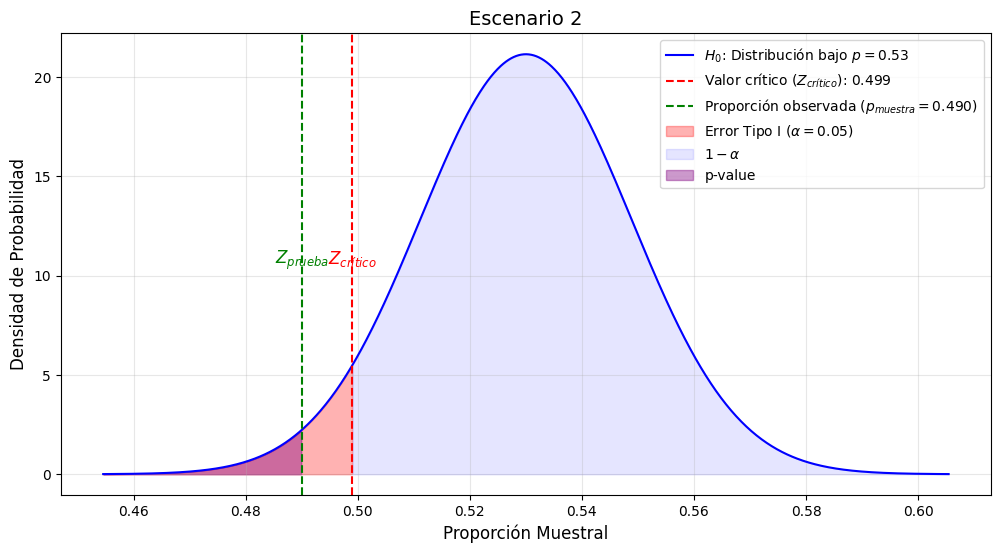

In [18]:
# 1. Parámetros iniciales
p = 0.53  # Proporción bajo H0
p_muestra = 0.49  # Proporción observada (muestra)
n = 700  # Tamaño de la muestra
Sigma = np.sqrt(p * (1 - p))  # Desviación estándar bajo H0
alpha = 0.05  # Nivel de significancia

# 2. Calcular valores clave
Zcritico = norm.ppf(alpha)  # Valor crítico para cola izquierda
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)  # Proporción crítica
Z_prueba = (p_muestra - p) / (Sigma / np.sqrt(n))  # Z estadístico

# 3. Generar distribuciones
x = np.linspace(p - 4 * Sigma / np.sqrt(n), p + 4 * Sigma / np.sqrt(n), 1000)  # Eje x
y_H0 = norm.pdf(x, loc=p, scale=Sigma / np.sqrt(n))  # Distribución bajo H0

# 4. Crear el gráfico
plt.figure(figsize=(12, 6))

# Distribución bajo H0
plt.plot(x, y_H0, label="$H_0$: Distribución bajo $p = 0.53$", color="blue")

# Líneas críticas
plt.axvline(valor_proporcion_zcritico, color="red", linestyle="--", label=f"Valor crítico ($Z_{{crítico}}$): {valor_proporcion_zcritico:.3f}")
plt.axvline(p_muestra, color="green", linestyle="--", label=f"Proporción observada ($p_{{muestra}} = {p_muestra:.3f}$)")

# Rellenar áreas
# Región de rechazo (Error Tipo I: alfa)
plt.fill_between(x, y_H0, 0, where=(x < valor_proporcion_zcritico), color="red", alpha=0.3, label=f"Error Tipo I ($\\alpha = {alpha:.2f}$)")
# Región de no rechazo bajo H0
plt.fill_between(x, y_H0, 0, where=(x >= valor_proporcion_zcritico), color="blue", alpha=0.1, label="$1 - \\alpha$")
# Región del p-value
plt.fill_between(x, y_H0, 0, where=(x < p_muestra), color="purple", alpha=0.4, label="p-value")

# Anotaciones
plt.text(valor_proporcion_zcritico, max(y_H0) * 0.5, f"$Z_{{crítico}}$", color="red", fontsize=12, ha="center")
plt.text(p_muestra, max(y_H0) * 0.5, f"$Z_{{prueba}}$", color="green", fontsize=12, ha="center")

# Configuración del gráfico
plt.title("Escenario 2", fontsize=14)
plt.xlabel("Proporción Muestral", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

Para esta prueba de Hipótesis, como el valor de proporción muestral obtenido con los 700 visitantes fue de $\text{Tasa rebote} = 49\%$, cifra menor al límite de 0.499, se puede concluir que el rebote obtenido con la nueva versión ha disminuido de forma estadísticamente significativa, esto al comparar con su línea base de 0.53.

In [19]:
# 6. Calcular el estadístico Z de prueba
Z_prueba = (p_muestra - p) / (Sigma / np.sqrt(n))
print(f"Z prueba: {Z_prueba:.2f}")

# 7. Calcular el p-value y comparar con el nivel de significancia
# Usando el estadístico Z (cola izquierda, unilateral)
pvalue = norm.cdf(Z_prueba)
print(f"p-value (significancia estadística): {pvalue:.3f}")

# Otra forma usando Scipy directamente para la proporción observada
pvalue_scipy = norm(p, Sigma / np.sqrt(n)).cdf(p_muestra)
print(f"p-value con scipy: {pvalue_scipy:.3f}")

# Regla de decisión
if pvalue < alpha:
    print(f"Conclusión: Rechazamos H0 con un nivel de significancia de {alpha}.")
    print("El resultado es estadísticamente significativo.")
else:
    print(f"Conclusión: No rechazamos H0 con un nivel de significancia de {alpha}.")
    print("El resultado no es estadísticamente significativo.")

Z prueba: -2.12
p-value (significancia estadística): 0.017
p-value con scipy: 0.017
Conclusión: Rechazamos H0 con un nivel de significancia de 0.05.
El resultado es estadísticamente significativo.


**Concluir prueba de hipótesis Escenario 2**

Como el $Z_{prueba}$ (-2.120) es menor al $Z_{critico}$ (-1.645), o como el valor-p ($\text{p-value} = 0.016$) es menor al Nivel de signficancia "alpha" establecido en 0.05, se rechaza $H_0$. Por tanto se concluye que existe una diferencia estadísticamente significativa entre la tasa de rebote exhibida en la nueva versión y la tasa de rebote de la línea base.

In [20]:
# Calcular valores clave
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)  # Proporción crítica (valor límite)

# 8. Calcular el tamaño del efecto
efecto = p - p_muestra  # Diferencia bruta entre proporciones
dCohen = efecto / Sigma  # d de Cohen (tamaño del efecto estandarizado)
print(f"Tamaño del efecto (bruto): {efecto:.3f}")
print(f"Tamaño del efecto (d de Cohen): {dCohen:.3f}")

# 9. Calcular la potencia de la prueba (1 - beta)
# Beta (Error Tipo II)
beta = 1 - norm(p_muestra, Sigma / np.sqrt(n)).cdf(valor_proporcion_zcritico)
potencia = 1 - beta  # Potencia de la prueba

# Resultados
print(f"Beta (Error Tipo II): {beta:.3f}")
print(f"Potencia de la prueba (1 - Beta): {potencia:.3f}")

# Conclusión sobre la potencia
if potencia >= 0.8:
    print("La potencia es adecuada (>= 0.8) para detectar el efecto esperado.")
else:
    print("La potencia es baja (< 0.8); el tamaño de la muestra puede no ser suficiente.")

Tamaño del efecto (bruto): 0.040
Tamaño del efecto (d de Cohen): 0.080
Beta (Error Tipo II): 0.317
Potencia de la prueba (1 - Beta): 0.683
La potencia es baja (< 0.8); el tamaño de la muestra puede no ser suficiente.


Visualicemos el Escenario 2.

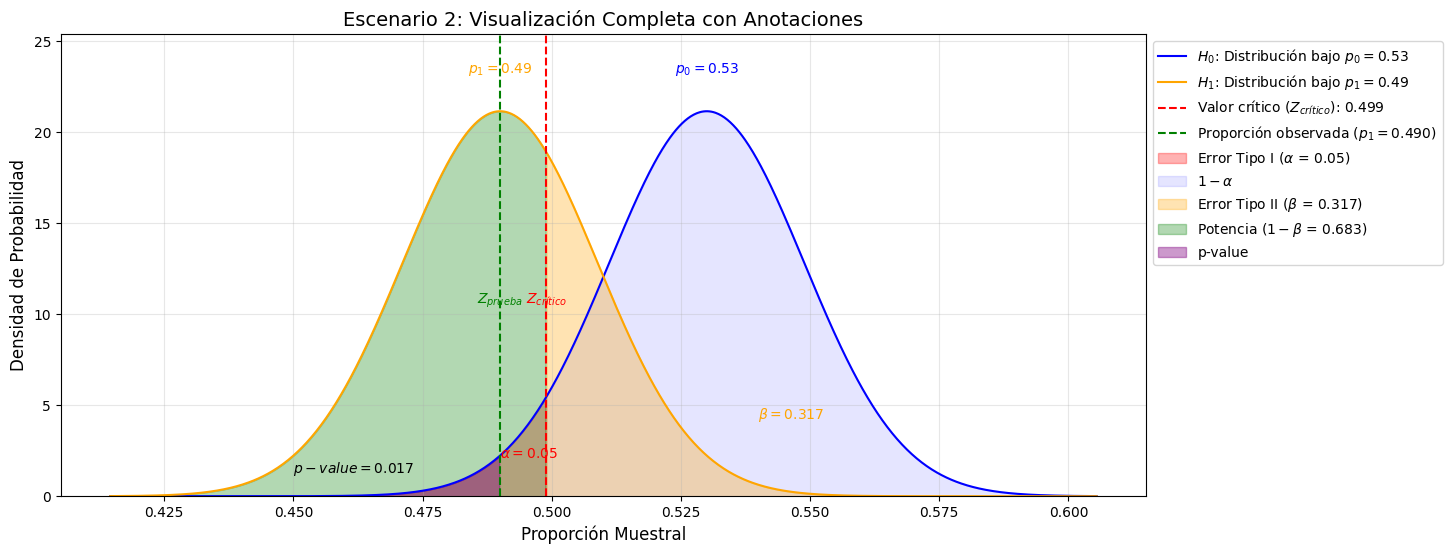

In [21]:
# 1. Parámetros iniciales
p = 0.53  # Proporción bajo H0 (p0)
p_muestra = 0.49  # Proporción observada (p1)
n = 700  # Tamaño de la muestra
Sigma = np.sqrt(p * (1 - p))  # Desviación estándar bajo H0
Sigma_muestra = np.sqrt(p_muestra * (1 - p_muestra))  # Desviación estándar bajo H1
alpha = 0.05  # Nivel de significancia

# 2. Calcular valores clave
Zcritico = norm.ppf(alpha)  # Z crítico para cola izquierda
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)  # Proporción crítica
Z_prueba = (p_muestra - p) / (Sigma / np.sqrt(n))  # Z de la prueba
beta = 1 - norm(p_muestra, Sigma / np.sqrt(n)).cdf(valor_proporcion_zcritico)  # Beta
potencia = 1 - beta  # Potencia

# 3. Generar distribuciones
x = np.linspace(p_muestra - 4 * Sigma / np.sqrt(n), p + 4 * Sigma / np.sqrt(n), 1000)  # Eje x
y_H0 = norm.pdf(x, loc=p, scale=Sigma / np.sqrt(n))  # Distribución bajo H0
y_H1 = norm.pdf(x, loc=p_muestra, scale=Sigma / np.sqrt(n))  # Distribución bajo H1

# 4. Crear el gráfico
plt.figure(figsize=(14, 6))
plt.ylim(0, max(y_H1)*1.2)

# Distribución bajo H0
plt.plot(x, y_H0, label="$H_0$: Distribución bajo $p_0 = 0.53$", color="blue")
# Distribución bajo H1
plt.plot(x, y_H1, label="$H_1$: Distribución bajo $p_1 = 0.49$", color="orange")

# Línea crítica
plt.axvline(valor_proporcion_zcritico, color="red", linestyle="--", label=f"Valor crítico ($Z_{{crítico}}$): {valor_proporcion_zcritico:.3f}")
# Línea de proporción observada
plt.axvline(p_muestra, color="green", linestyle="--", label=f"Proporción observada ($p_1 = {p_muestra:.3f}$)")

# Rellenar áreas
# Región de rechazo (Error Tipo I: alfa)
plt.fill_between(x, y_H0, 0, where=(x < valor_proporcion_zcritico), color="red", alpha=0.3, label=f"Error Tipo I ($\\alpha$ = {alpha:.2f})")
# Región de no rechazo bajo H0
plt.fill_between(x, y_H0, 0, where=(x >= valor_proporcion_zcritico), color="blue", alpha=0.1, label="$1 - \\alpha$")
# Región de beta (Error Tipo II)
plt.fill_between(x, y_H1, 0, where=(x > valor_proporcion_zcritico), color="orange", alpha=0.3, label=f"Error Tipo II ($\\beta$ = {beta:.3f})")
# Región de potencia
plt.fill_between(x, y_H1, 0, where=(x <= valor_proporcion_zcritico), color="green", alpha=0.3, label=f"Potencia ($1 - \\beta$ = {potencia:.3f})")
# Región del p-value
plt.fill_between(x, y_H0, 0, where=(x < p_muestra), color="purple", alpha=0.4, label="p-value")

# Anotaciones
plt.text(p, max(y_H0) * 1.1, f"$p_0 = {p:.2f}$", fontsize=10, color="blue", ha="center")
plt.text(p_muestra, max(y_H1) * 1.1, f"$p_1 = {p_muestra:.2f}$", fontsize=10, color="orange", ha="center")
plt.text(valor_proporcion_zcritico, max(y_H0) * 0.5, f"$Z_{{crítico}}$", color="red", fontsize=10, ha="center")
plt.text(p_muestra, max(y_H1) * 0.5, f"$Z_{{prueba}}$", color="green", fontsize=10, ha="center")
plt.text(p_muestra+0.05, max(y_H1) * 0.2, f"$\\beta = {beta:.3f}$", fontsize=10, color="orange")
plt.text(p_muestra, max(y_H0) * 0.1, f"$\\alpha = {alpha:.2f}$", fontsize=10, color="red")
plt.text(p_muestra-0.04, max(y_H0) * 0.06, f"$p-value = {norm.cdf(Z_prueba):.3f}$", fontsize=10, color="black")

# Configuración del gráfico
plt.title("Escenario 2: Visualización Completa con Anotaciones", fontsize=14)
plt.xlabel("Proporción Muestral", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

**Conclusión final Escanario 2**

El tratamiento "nueva versión del sitio web" aplicado en 700 usuarios aleatorios durante 1 semana, demuestra que la Tasa de Rebote de 49% exhibida es estadísticamente menor que el actual, esto con un nivel de confianza del 0.95.

También se aprecia que la diferencia (tamaño del efecto bruto) obtenida es menor a lo requerido por el negocio, ya que es de sólo 400 puntos base, y, además, al evaluar la potencia, el análisis arrojó un Poder por debajo del mínimo recomendable de 0.80, es decir, el efecto obtenido por el tratamiento no solo no cumple lo esperado por el negocio, sino que además no tiene una potencia aceptable para respaldar la $H_1$ (Hipótesis alternativa).
No se puede afirmar que el tratamiento funciona.

### <font color='green'>Actividad 2</font>
#### 5.3. Análisis del Escenario 3

Realiza los mismos cálculos que en el escanario 1, pero esta vez con $n=700$ y Tasa de Rebote de 47%.

Visualiza y concluye.

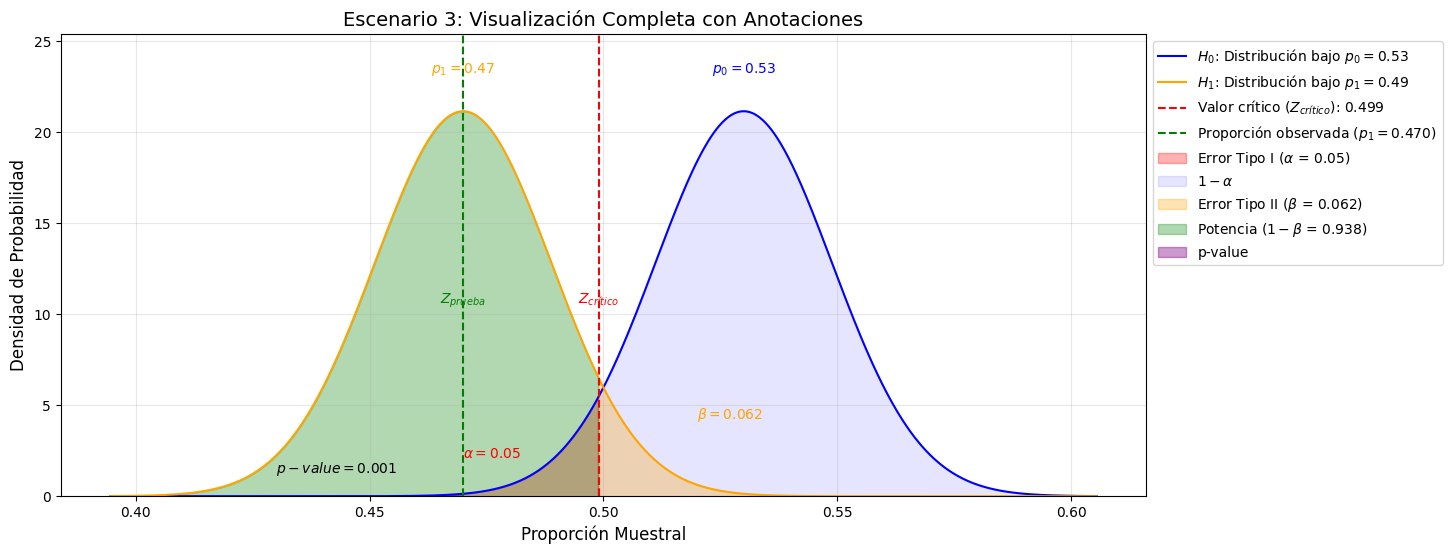

In [25]:
# Tu código aquí ...
# 1. Parámetros iniciales
p = 0.53  # Proporción bajo H0 (p0)
p_muestra = 0.47  # Proporción observada (p1)
n = 700  # Tamaño de la muestra
Sigma = np.sqrt(p * (1 - p))  # Desviación estándar bajo H0
Sigma_muestra = np.sqrt(p_muestra * (1 - p_muestra))  # Desviación estándar bajo H1
alpha = 0.05  # Nivel de significancia

# 2. Calcular valores clave
Zcritico = norm.ppf(alpha)  # Z crítico para cola izquierda
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)  # Proporción crítica
Z_prueba = (p_muestra - p) / (Sigma / np.sqrt(n))  # Z de la prueba
beta = 1 - norm(p_muestra, Sigma / np.sqrt(n)).cdf(valor_proporcion_zcritico)  # Beta
potencia = 1 - beta  # Potencia

# 3. Generar distribuciones
x = np.linspace(p_muestra - 4 * Sigma / np.sqrt(n), p + 4 * Sigma / np.sqrt(n), 1000)  # Eje x
y_H0 = norm.pdf(x, loc=p, scale=Sigma / np.sqrt(n))  # Distribución bajo H0
y_H1 = norm.pdf(x, loc=p_muestra, scale=Sigma / np.sqrt(n))  # Distribución bajo H1

# 4. Crear el gráfico
plt.figure(figsize=(14, 6))
plt.ylim(0, max(y_H1)*1.2)

# Distribución bajo H0
plt.plot(x, y_H0, label="$H_0$: Distribución bajo $p_0 = 0.53$", color="blue")
# Distribución bajo H1
plt.plot(x, y_H1, label="$H_1$: Distribución bajo $p_1 = 0.49$", color="orange")

# Línea crítica
plt.axvline(valor_proporcion_zcritico, color="red", linestyle="--", label=f"Valor crítico ($Z_{{crítico}}$): {valor_proporcion_zcritico:.3f}")
# Línea de proporción observada
plt.axvline(p_muestra, color="green", linestyle="--", label=f"Proporción observada ($p_1 = {p_muestra:.3f}$)")

# Rellenar áreas
# Región de rechazo (Error Tipo I: alfa)
plt.fill_between(x, y_H0, 0, where=(x < valor_proporcion_zcritico), color="red", alpha=0.3, label=f"Error Tipo I ($\\alpha$ = {alpha:.2f})")
# Región de no rechazo bajo H0
plt.fill_between(x, y_H0, 0, where=(x >= valor_proporcion_zcritico), color="blue", alpha=0.1, label="$1 - \\alpha$")
# Región de beta (Error Tipo II)
plt.fill_between(x, y_H1, 0, where=(x > valor_proporcion_zcritico), color="orange", alpha=0.3, label=f"Error Tipo II ($\\beta$ = {beta:.3f})")
# Región de potencia
plt.fill_between(x, y_H1, 0, where=(x <= valor_proporcion_zcritico), color="green", alpha=0.3, label=f"Potencia ($1 - \\beta$ = {potencia:.3f})")
# Región del p-value
plt.fill_between(x, y_H0, 0, where=(x < p_muestra), color="purple", alpha=0.4, label="p-value")

# Anotaciones
plt.text(p, max(y_H0) * 1.1, f"$p_0 = {p:.2f}$", fontsize=10, color="blue", ha="center")
plt.text(p_muestra, max(y_H1) * 1.1, f"$p_1 = {p_muestra:.2f}$", fontsize=10, color="orange", ha="center")
plt.text(valor_proporcion_zcritico, max(y_H0) * 0.5, f"$Z_{{crítico}}$", color="red", fontsize=10, ha="center")
plt.text(p_muestra, max(y_H1) * 0.5, f"$Z_{{prueba}}$", color="green", fontsize=10, ha="center")
plt.text(p_muestra+0.05, max(y_H1) * 0.2, f"$\\beta = {beta:.3f}$", fontsize=10, color="orange")
plt.text(p_muestra, max(y_H0) * 0.1, f"$\\alpha = {alpha:.2f}$", fontsize=10, color="red")
plt.text(p_muestra-0.04, max(y_H0) * 0.06, f"$p-value = {norm.cdf(Z_prueba):.3f}$", fontsize=10, color="black")

# Configuración del gráfico
plt.title("Escenario 3: Visualización Completa con Anotaciones", fontsize=14)
plt.xlabel("Proporción Muestral", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


In [24]:
# Calcular valores clave
valor_proporcion_zcritico = norm(p, Sigma / np.sqrt(n)).ppf(alpha)  # Proporción crítica (valor límite)

# 8. Calcular el tamaño del efecto
efecto = p - p_muestra  # Diferencia bruta entre proporciones
dCohen = efecto / Sigma  # d de Cohen (tamaño del efecto estandarizado)
print(f"Tamaño del efecto (bruto): {efecto:.3f}")
print(f"Tamaño del efecto (d de Cohen): {dCohen:.3f}")

# 9. Calcular la potencia de la prueba (1 - beta)
# Beta (Error Tipo II)
beta = 1 - norm(p_muestra, Sigma / np.sqrt(n)).cdf(valor_proporcion_zcritico)
potencia = 1 - beta  # Potencia de la prueba

# Resultados
print(f"Beta (Error Tipo II): {beta:.3f}")
print(f"Potencia de la prueba (1 - Beta): {potencia:.3f}")

# Conclusión sobre la potencia
if potencia >= 0.8:
    print("La potencia es adecuada (>= 0.8) para detectar el efecto esperado.")
else:
    print("La potencia es baja (< 0.8); el tamaño de la muestra puede no ser suficiente.")

Tamaño del efecto (bruto): 0.060
Tamaño del efecto (d de Cohen): 0.120
Beta (Error Tipo II): 0.062
Potencia de la prueba (1 - Beta): 0.938
La potencia es adecuada (>= 0.8) para detectar el efecto esperado.


el escenario 2, para comparar:

```

Tamaño del efecto (bruto): 0.040
Tamaño del efecto (d de Cohen): 0.080
Beta (Error Tipo II): 0.317
Potencia de la prueba (1 - Beta): 0.683
La potencia es baja (< 0.8); el tamaño de la muestra puede no ser suficiente.

# This is formatted as code
```



Visualización Escenario 3.

<font color='green'>Fin actividad 2</font>

<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen**</font>


El poder estadístico es una medida crucial en el diseño y análisis de experimentos, ya que determina la capacidad de un estudio para detectar efectos o diferencias reales en una población. En las pruebas de hipótesis de una muestra, el poder estadístico evalúa la probabilidad de rechazar correctamente una hipótesis nula falsa, es decir, cuando hay un efecto verdadero presente.


El cálculo del poder estadístico implica varios componentes clave. En primer lugar, se requiere definir la hipótesis nula y alternativa, así como el nivel de significancia (alfa), que representa el umbral para rechazar la hipótesis nula. Luego, se selecciona una medida de efecto relevante, como la diferencia de media o proporción frente a un target, la que representa la magnitud del efecto bajo la hipótesis alternativa.


El tamaño de muestra es otro factor crucial que afecta al poder estadístico. A medida que aumenta el tamaño de muestra, el poder estadístico tiende a aumentar, lo que significa una mayor probabilidad de detectar efectos reales, pero también de mayores costos en las pruebas. Además, la variabilidad de los datos también influye en el poder: una menor variabilidad conduce a un mayor poder, ya que los datos son más precisos y se pueden distinguir mejor los efectos.

Un par de conceptos adicionales:

* Análisis a priori: En términos de pruebas estadísticas, significa que antes de recolectar datos, decides qué pruebas vas a hacer y cómo las vas a evaluar. Esto es importante porque te ayuda a evitar tomar decisiones basadas en los resultados que obtienes después, lo que podría llevar a conclusiones incorrectas.

* Análisis post hoc: Un análisis post hoc se realiza después de recopilar los datos y llevar a cabo pruebas estadísticas. En este caso, podrías encontrarte con resultados inesperados o interesantes. Sin embargo, hacer muchas pruebas sin un plan claro antes de comenzar el experimento puede llevar a un problema llamado "p-hacking", donde seleccionas las pruebas que muestran resultados significativos y ignoras las que no lo hacen.